In [1]:

import pybaseball as pyb, pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
pyb.cache.enable()
import numpy as np

In [2]:
# parse the database "pitch_arsenal2023.db" and print the table structure
import sqlite3
# connect to database
con = sqlite3.connect('../../data/databases/Final_Data.db')

# create cursor object and save the data into a dataframe with the names of the columns saved 
cursor = con.cursor()
query = "SELECT * FROM 'Parsed_Final_Data'"
data_list = cursor.execute(query).fetchall()

columns = [i[0] for i in cursor.description]
data_ready = pd.DataFrame.from_records(data_list, columns=columns)


In [ ]:
# create a new column with the win/loss indicator using 1 for wins and 0 for losses
#data_parsed['Win_Loss'] = data_parsed['W/L'].apply(lambda x: 1 if x.startswith('W') else 0)

#data_parsed['Tm'].fillna('MIA', inplace=True)
#data_parsed['Opp'].fillna('MIA', inplace=True)
## Check if there are any NaN values after mapping
#print(data_parsed['Tm'].isna().sum())
#print(data_parsed['Opp'].isna().sum())

#
#team_ids = pyb.team_ids(2021)
#teamids = team_ids[['teamIDBR','teamIDfg']]
#teamids = teamids.set_index('teamIDBR')
#
#
#id_changes = {
#    'ANA': 'LAA',
#    'MON': 'WSN',
#    'TBD': 'TBR',
#    'FLA': 'MIA',
# # This shows how changes can overlap or be redefined
#}
## Mapping with fallback to original values
#data_parsed['Tm'] = data_parsed['Tm'].map(id_changes)
#data_parsed['Opp'] = data_parsed['Opp'].map(id_changes)
#data_parsed['Tm'].fillna('MIA', inplace=True)
#data_parsed['Opp'].fillna('MIA', inplace=True)

# def transform_gb(value):
#    value = value.strip().lower()  # Normalize the string by stripping whitespace and converting to lower case
#    if value.startswith('up'):
#        # Handle concatenated "up" values without space
#        number_part = value.replace('up', '').strip()
#        return float(number_part) if number_part else 0
#    elif value == 'tied':
#        return 0
#    else:
#        return -float(value)
#    
#data_parsed['GB'] = data_parsed['GB'].apply(transform_gb)


#data_parsed.to_sql('Final_Data', con, if_exists='replace', index=False)

#data_parsed['D/N'] = data_parsed['D/N'].apply(lambda x: 1 if x == 'D' else 0)
# Define a function to calculate winning percentage
#def calculate_winning_percentage(record):
#    wins, losses = map(int, record.split('-'))
#    total_games = wins + losses
#    # Calculate the winning percentage
#    winning_percentage = int((wins / total_games) [] 100)
#    return winning_percentage
#
## Apply the function to the Record column and create a new column
#data_parsed['Winning Percentage'] = data_parsed['W-L'].apply(calculate_winning_percentage)
#data_ready['Tm'] = data_ready['Tm'].astype('float')
#data_ready['Opp'] = data_ready['Opp'].astype('float')
##cols = data_parsed.columns.to_list()
#data_ready = data_parsed.drop(['Date','W/L','W-L','R','RA','Win','Loss','Save','Time'], axis=1)
#data_ready['Tm'] = data_ready['Tm'].replace('MIA',20)
#data_ready['Opp'] = data_ready['Opp'].replace('MIA',20)
#print(data_ready['Opp'].unique())
#data_ready.info()
#data_ready.to_sql('Parsed_Final_Data', con, if_exists='replace')

In [ ]:
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.model_selection import GridSearchCV
#
## Set up the parameter grid
#param_grid = {
#    'n_estimators': [100, 200, 300],
#    'max_depth': [None, 1, 5, 10],
#    'min_samples_split': [1,2,4],
#    'min_samples_leaf': [1, 2, 4],
#}
#
## Initialize the classifier
#rfc = RandomForestClassifier(random_state=42)
#
## Set up the grid search
#grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=3, scoring='accuracy', verbose=2, n_jobs=-1)
#
## Fit grid search to the data
#grid_search.fit(X_train, y_train)
#best_classifier = grid_search.best_estimator_

# Predict and evaluate
#predictions = best_classifier.predict(X_test)
#print(f'Best parameters: {grid_search.best_params_}')
#print(f'Accuracy: {accuracy_score(y_test, predictions)}')

In [3]:


data_ready.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91031 entries, 0 to 91030
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               91031 non-null  int64  
 1   Tm                  91031 non-null  float64
 2   Home_Away           91031 non-null  int64  
 3   Opp                 91031 non-null  float64
 4   Inn                 91031 non-null  float64
 5   Rank                91031 non-null  float64
 6   GB                  91031 non-null  float64
 7   D/N                 91031 non-null  int64  
 8   cLI                 91031 non-null  object 
 9   Streak              91031 non-null  float64
 10  WinningPct          91031 non-null  float64
 11  EMA10RunsScored     91031 non-null  float64
 12  EMA10RunsAllowed    91031 non-null  float64
 13  TmElo               91031 non-null  float64
 14  OppElo              91031 non-null  float64
 15  Win_Loss            91031 non-null  int64  
 16  Winn

In [4]:
from sklearn.model_selection import train_test_split

X = data_ready.drop('Win_Loss', axis=1)  # Features
y = data_ready['Win_Loss']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy: 1.0

In [6]:
rfc = RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_leaf=1, min_samples_split=2)

In [7]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [14]:
from sklearn.metrics import accuracy_score
predictions = rfc.predict(X_test)
random_results = accuracy_score(y_test, predictions)
for y_test in y_test:
    for predictions in predictions:
        print(f"{predictions} : {y_test}")
print(f"Random Forest Accuracy: {random_results}")

1 : 1
0 : 1
1 : 1
0 : 1
1 : 1
0 : 1
1 : 1
1 : 1
1 : 1
1 : 1
1 : 1
0 : 1
1 : 1
0 : 1
1 : 1
1 : 1
1 : 1
0 : 1
1 : 1
0 : 1
1 : 1
1 : 1
0 : 1
1 : 1
0 : 1
0 : 1
1 : 1
0 : 1
0 : 1
1 : 1
0 : 1
0 : 1
0 : 1
0 : 1
1 : 1
0 : 1
0 : 1
1 : 1
0 : 1
1 : 1
0 : 1
1 : 1
0 : 1
1 : 1
0 : 1
0 : 1
1 : 1
0 : 1
1 : 1
1 : 1
1 : 1
1 : 1
1 : 1
1 : 1
0 : 1
0 : 1
1 : 1
1 : 1
0 : 1
1 : 1
1 : 1
1 : 1
0 : 1
1 : 1
1 : 1
0 : 1
0 : 1
0 : 1
0 : 1
1 : 1
0 : 1
0 : 1
0 : 1
0 : 1
1 : 1
1 : 1
0 : 1
1 : 1
0 : 1
0 : 1
1 : 1
0 : 1
0 : 1
0 : 1
0 : 1
1 : 1
0 : 1
0 : 1
1 : 1
0 : 1
1 : 1
1 : 1
1 : 1
1 : 1
1 : 1
1 : 1
1 : 1
0 : 1
0 : 1
0 : 1
0 : 1
0 : 1
1 : 1
1 : 1
1 : 1
1 : 1
0 : 1
1 : 1
0 : 1
0 : 1
1 : 1
0 : 1
0 : 1
1 : 1
0 : 1
1 : 1
0 : 1
1 : 1
1 : 1
1 : 1
0 : 1
1 : 1
1 : 1
1 : 1
1 : 1
0 : 1
1 : 1
1 : 1
0 : 1
0 : 1
1 : 1
0 : 1
1 : 1
0 : 1
0 : 1
1 : 1
0 : 1
0 : 1
1 : 1
0 : 1
0 : 1
1 : 1
1 : 1
1 : 1
1 : 1
0 : 1
0 : 1
0 : 1
0 : 1
1 : 1
0 : 1
0 : 1
0 : 1
0 : 1
1 : 1
0 : 1
0 : 1
1 : 1
1 : 1
1 : 1
1 : 1
0 : 1
1 : 1
1 : 1
1 : 1
0 : 1
1 : 

TypeError: 'numpy.int64' object is not iterable

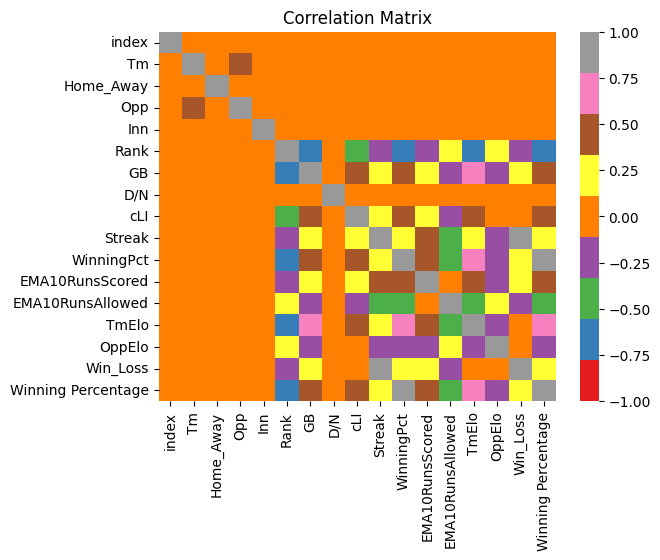

In [25]:
corr = data_ready.corr()
import seaborn as sns

# Plot the correlation matrix

sns.heatmap(corr, cmap='Set1', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()


In [ ]:
corr['Win_Loss'].sort_values(ascending=False)

In [27]:
#the above code shows the correlation between the features and the target variable.
#---------------------------------
#|Win_Loss             | 1.000000|
#|Streak               | 0.802501|
#|EMA10RunsScored      |0.304739|
#|Winning Percentage   | 0.243208|
#|WinningPct           | 0.243103|
#|GB                   | 0.135432|
#|Home_Away            | 0.082664|
#|TmElo                | 0.071488|
#|cLI                  | 0.049112|
#|D/N                  | 0.000138|
#|Inn                  |-0.000719|
#|Tm                   |-0.001382|
#|index                |-0.002147|
#|Opp                  |-0.003969|
#|OppElo               |-0.019190|
#|Rank                 |-0.188062|
#|EMA10RunsAllowed     |-0.303661|
#Name: Win_Loss, dtype: float64

In [28]:
from sklearn.metrics import mean_squared_error
# Evaluate the model
mse = mean_squared_error(y_test, predictions)
rmse = mse ** 0.5

print(f"Model RMSE: {rmse}")

InvalidParameterError: The 'y_true' parameter of mean_squared_error must be an array-like. Got 0 instead.

In [20]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Initialize the model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),  # X_train.shape[1] is the number of features
    Dropout(0.5),  # Dropout for regularization
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Use 'sigmoid' for binary classification, 'softmax' for multiclass
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',  # Use 'categorical_crossentropy' for multi-class
              metrics=['accuracy'])




C:\Users\rhoffpauir\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
predict = model.predict(X_test)

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, predict)

569/569 ━━━━━━━━━━━━━━━━━━━━ 1s 915us/step


In [23]:
print(accuracy)

0.5024441149008623
